In [3]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

Pour commencer on se met dans le répertoire de notre corpus

In [5]:
cwd = os.getcwd()
print(cwd)

C:\Users\jeanb\Documents\memoire\corpus_chapitres


In [6]:
os.chdir(cwd+"/romans-master")

On stocke nos noms de fichiers dans une liste 

In [7]:
titres_romans = os.listdir()

In [8]:
print(len(titres_romans))

2964


On sépare dans les noms de fichiers la date, le nom des auteurs et le nom de leur roman avec split() 

In [9]:
def split_titre(titres):
    titre_split = []
    for elem in titres:
        titre_split.append(elem.split("_"))
    return titre_split

In [10]:
titre_split = split_titre(titres_romans)

On utilise panda et un dataframe pour structurer le resultat du split. /!\ ATTENTION /!\ il faut nettoyer les noms de fichier avant cette manipulation. Il faut seulement trois "_" dans les titres. J'ai du modifier une trentaine de nom de fichier (erreurs, option 'remastered' enlevée)

In [11]:
df_titre = pd.DataFrame(titre_split, columns = ['date', 'auteur','titre']) 

In [13]:
print(df_titre)

      date                           auteur  \
0     1811   Chateaubriand-François-Rene-de   
1     1812                     Kock-Paul-de   
2     1815                       Gay-Sophie   
3     1815                       Gay-Sophie   
4     1816  Barthelemy-Hadot-Marie-Adelaide   
...    ...                              ...   
2959  2018                  Quignard-Pascal   
2960  2019                 Dabos-Christelle   
2961  2019                Murail-Marie-Aude   
2962  2020                Melois-Clementine   
2963  2020                Springora-Vanessa   

                                                  titre  
0     Oeuvres-completes-de-Chateaubriand-augmentees-...  
1                              L-enfant-de-ma-femme.xml  
2                                     Anatole-Vol-1.xml  
3                                     Anatole-Vol-2.xml  
4     La-Vierge-de-l-Indostan-ou-les-Portugais-au-Ma...  
...                                                 ...  
2959        L-enfant-d-Ingols

On récupère nos trois listes (date, auteur, titre) du dataframe

In [11]:
list_date = list(df_titre['date'])
list_auteur = list(df_titre['auteur'])
list_titre = list(df_titre['titre'])

On en fait trois dictionnaires avec Counter, qui compte les occurences de chaque nouvelle entrée

In [12]:
dict_date = Counter(list_date)
dict_auteur = Counter(list_auteur)
dict_titre = Counter(list_titre)

In [27]:
dict_date

Counter({'1811': 1,
         '1812': 1,
         '1815': 2,
         '1816': 7,
         '1817': 3,
         '1819': 3,
         '1821': 1,
         '1822': 3,
         '1823': 1,
         '1824': 4,
         '1825': 2,
         '1826': 4,
         '1827': 8,
         '1828': 1,
         '1829': 5,
         '1830': 3,
         '1831': 11,
         '1832': 13,
         '1833': 9,
         '1834': 12,
         '1835': 5,
         '1836': 7,
         '1837': 7,
         '1838': 9,
         '1839': 7,
         '1840': 9,
         '1841': 4,
         '1842': 24,
         '1843': 34,
         '1844': 23,
         '1845': 45,
         '1846': 36,
         '1847': 15,
         '1848': 7,
         '1849': 12,
         '1850': 14,
         '1851': 12,
         '1852': 9,
         '1853': 13,
         '1854': 16,
         '1855': 19,
         '1856': 17,
         '1857': 18,
         '1858': 19,
         '1859': 21,
         '1860': 18,
         '1861': 16,
         '1862': 28,
         '1863': 1

Affichons ces données sous forme de diagramme avec matplotlib

In [14]:
annees = list(dict_date.keys())
conteur = list(dict_date.values())

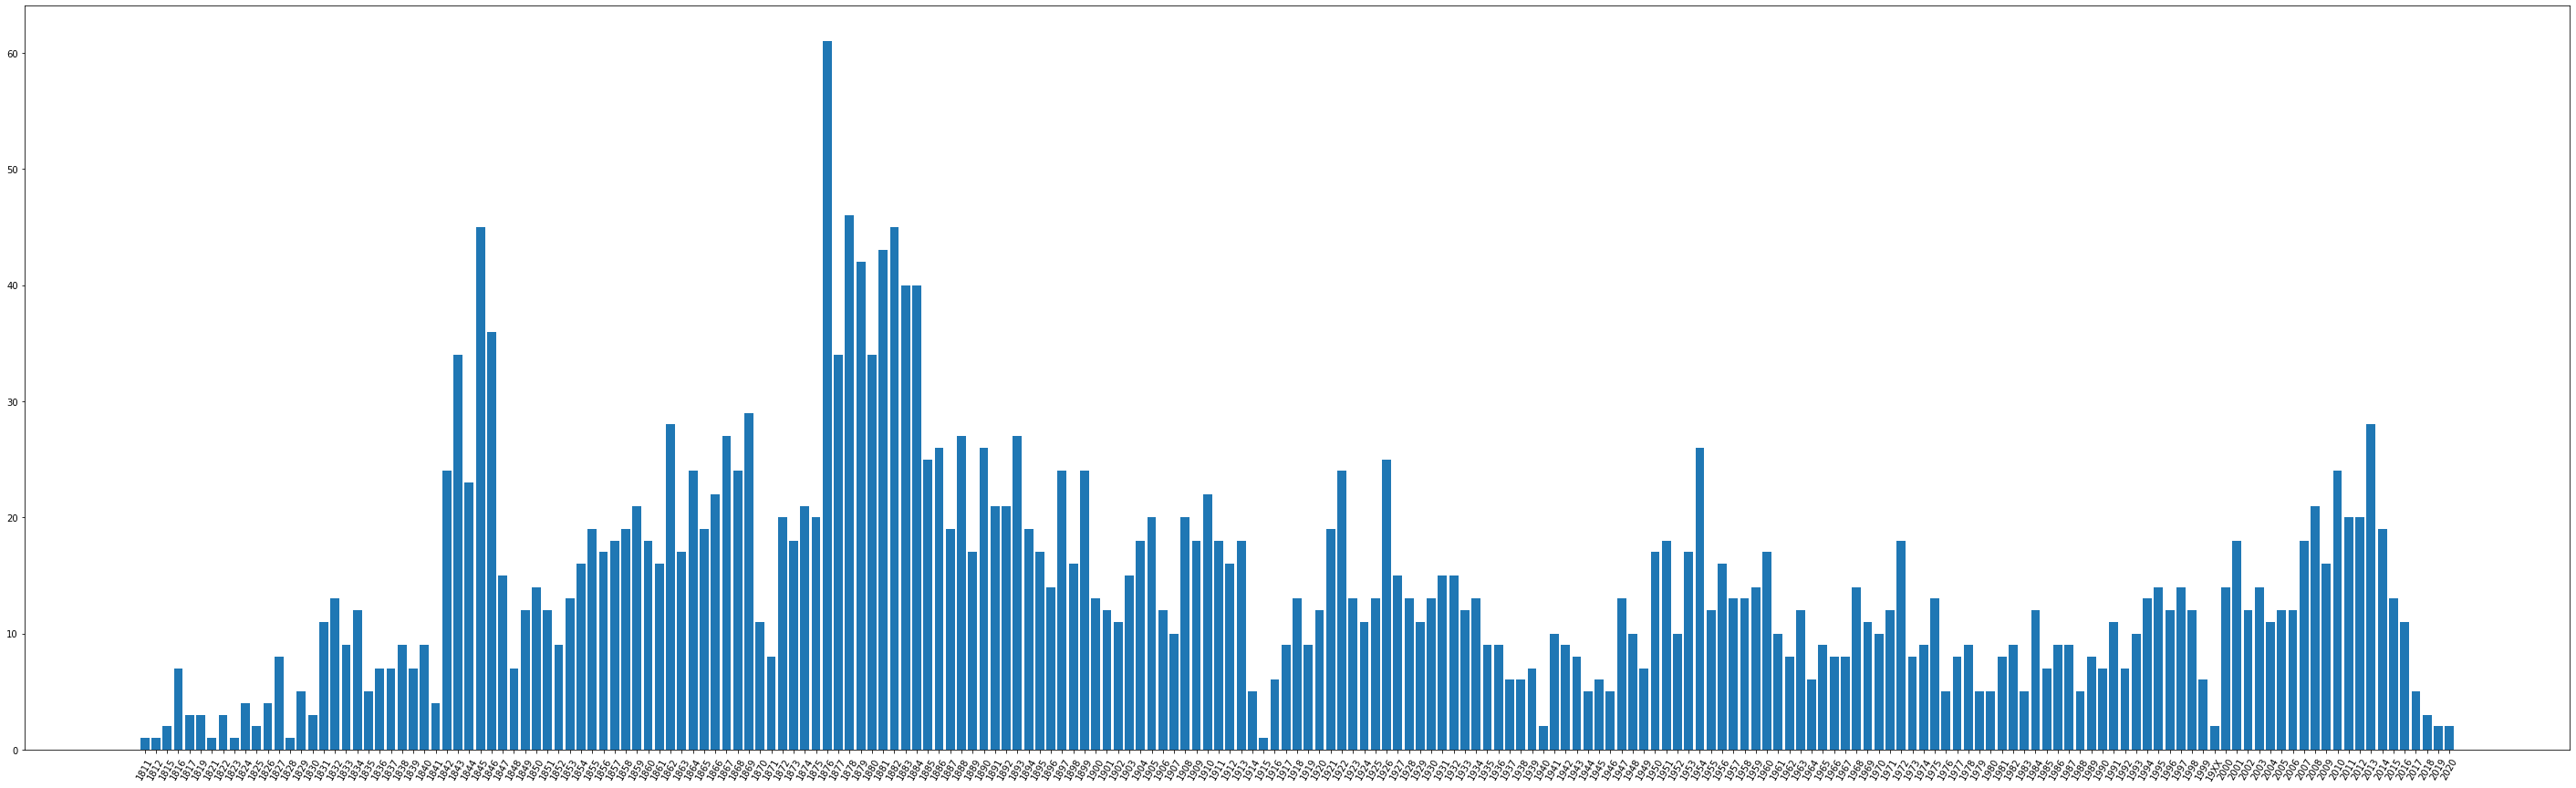

In [15]:
plt.figure(figsize=(50,15))
plt.bar(annees,conteur)
plt.xticks(rotation=60)
plt.show()

Ce n'est pas très satisfaisant.
Essayons de regrouper par décennies les données

In [16]:
def date_par_decennie(dico_date):
    i = 1
    compteur_tempo = 0
    decennie = 1810
    dict_decennies = {}
    for date, compte in dico_date.items():
        compteur_tempo+=compte
        if i == 10:
            i = 1
            dict_decennies[decennie] = compteur_tempo
            compteur_tempo = 0
            decennie+=10
        i+=1
    return dict_decennies

In [17]:
dict_date_par_decennie = date_par_decennie(dict_date)

In [18]:
annees_decennie = list(dict_date_par_decennie.keys())
print(annees_decennie)
conteur_decennie = list(dict_date_par_decennie.values())

[1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


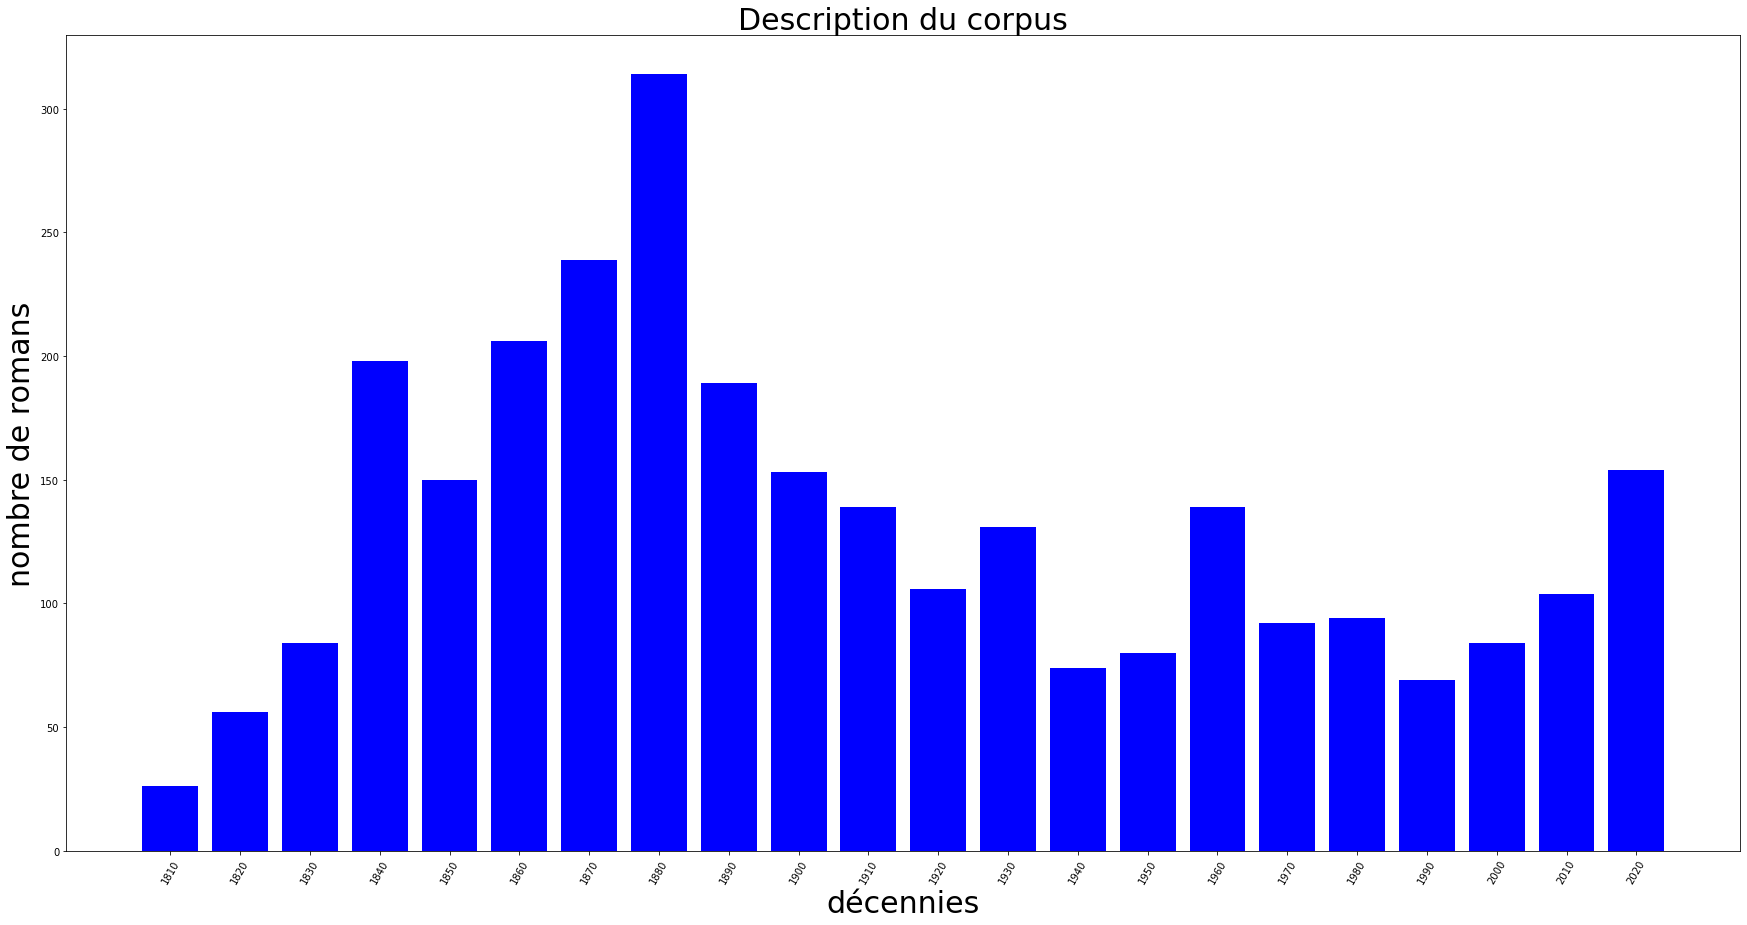

In [19]:
plt.figure(figsize=(30,15))
plt.bar(annees_decennie,conteur_decennie, 8, color='b')
plt.xticks(annees_decennie,rotation=60)
plt.ylabel('nombre de romans',fontsize=30)
plt.xlabel('décennies',fontsize=30)
plt.title('Description du corpus',fontsize=30)
plt.show()

In [82]:
def date_par_decennie_mieux(dico_date):
    dates = list(dico_date.keys())
    compteurs = list(dico_date.values())
    list_dizaine = []
    list_compteur_par_dizaine = []
    dizaine_deja_vue = []
    compte = 0
    type(dates[0])
    if len(dates) == len(compteurs):
        for i in range(len(dates)):
            if dates[i] != "19XX" and dates[i][0:3] != "181" and int(dates[i][0:3]) not in dizaine_deja_vue:
                dizaine_deja_vue.append(int(dates[i][0:3]))
                if int(dates[i]) % 10 == 0:
                    list_dizaine.append(int(dates[i]))
                else:
                    list_dizaine.append(int(dates[i])-1)
                list_compteur_par_dizaine.append(compte)
                compte = compteurs[i]
            else:
                compte += compteurs[i]
                
    return list_dizaine, list_compteur_par_dizaine   

In [83]:
list_dizaine, compteur_par_dizaine = date_par_decennie_mieux(dict_date)

In [88]:
print(list_dizaine)

[1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


In [85]:
print(compteur_par_dizaine)

[17, 29, 83, 209, 158, 224, 281, 316, 209, 149, 117, 156, 105, 75, 156, 103, 97, 77, 108, 148, 145]


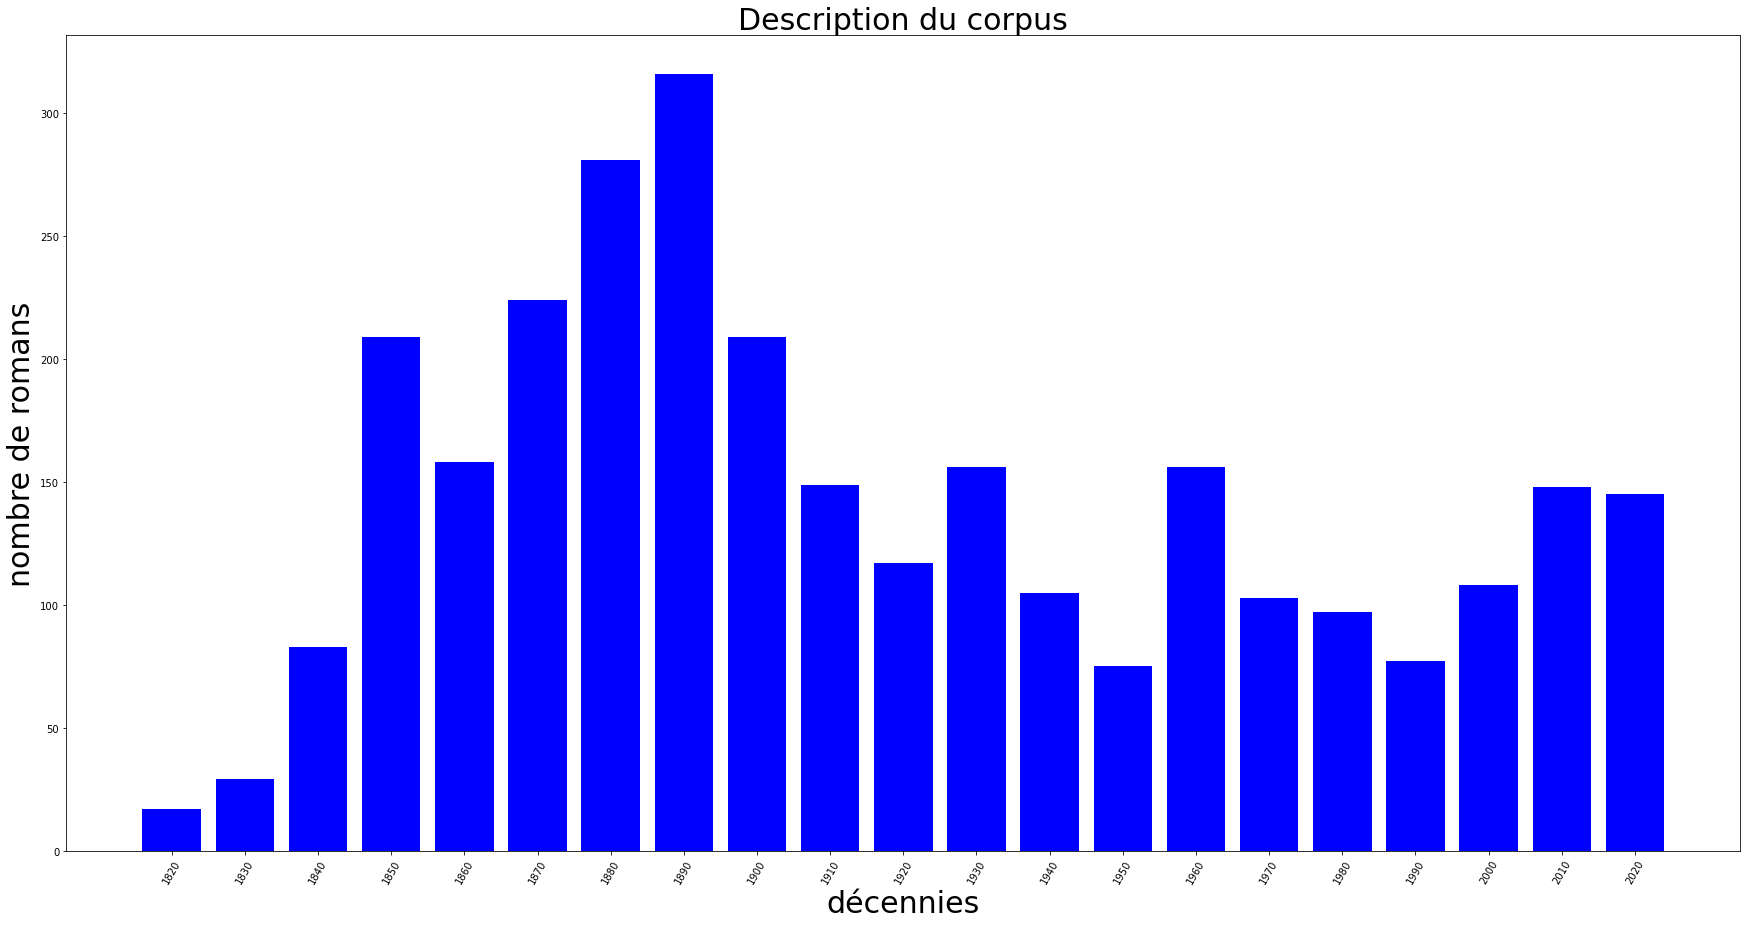

In [86]:
plt.figure(figsize=(30,15))
plt.bar(list_dizaine, compteur_par_dizaine, 8, color='b')
plt.xticks(list_dizaine, rotation=60)
plt.ylabel('nombre de romans', fontsize=30)
plt.xlabel('décennies', fontsize=30)
plt.title('Description du corpus', fontsize=30)
plt.show()

Utilisons le meme procédé pour les auteurs

In [20]:
dict_auteur

Counter({'Chateaubriand-François-Rene-de': 7,
         'Kock-Paul-de': 4,
         'Gay-Sophie': 4,
         'Barthelemy-Hadot-Marie-Adelaide': 9,
         'Bournon-Malarme-Charlotte-de': 3,
         'Constant-Benjamin': 1,
         'Arlincourt-Charles-Victor': 7,
         'Hugo-Victor': 12,
         'Duras-Claire-de-Durfort': 1,
         'Beaufort-d-Hautpoul-Anne-Marie-de': 1,
         'Beaufort-d-Hautpoul': 1,
         'Mazier-du-Heaume-Hippolyte': 2,
         'de-Lamothe-Langon-Etienne-Leon': 1,
         'Duras-Claire-de': 1,
         'Ginouvier-J-F-T.': 3,
         'Inconnu': 6,
         'Janin-Jules': 1,
         'Stendhal': 7,
         'Vidocq-Eugene-François': 4,
         'Vigny-Alfred-de': 3,
         'Custine-Astolphe-de': 1,
         'Giberton-Theodore': 1,
         'Merimee-Prosper': 6,
         'Sue-Eugene': 26,
         'Balzac-Honore-de': 85,
         'Barbey-d-Aurevilly-Jules': 8,
         'Montovar-Mme-Ha-Dges': 1,
         'Signol-Alphonse-Macaire-Stanislas': 5,
      

In [21]:
auteur = list(dict_auteur.keys())
conteur = list(dict_auteur.values())

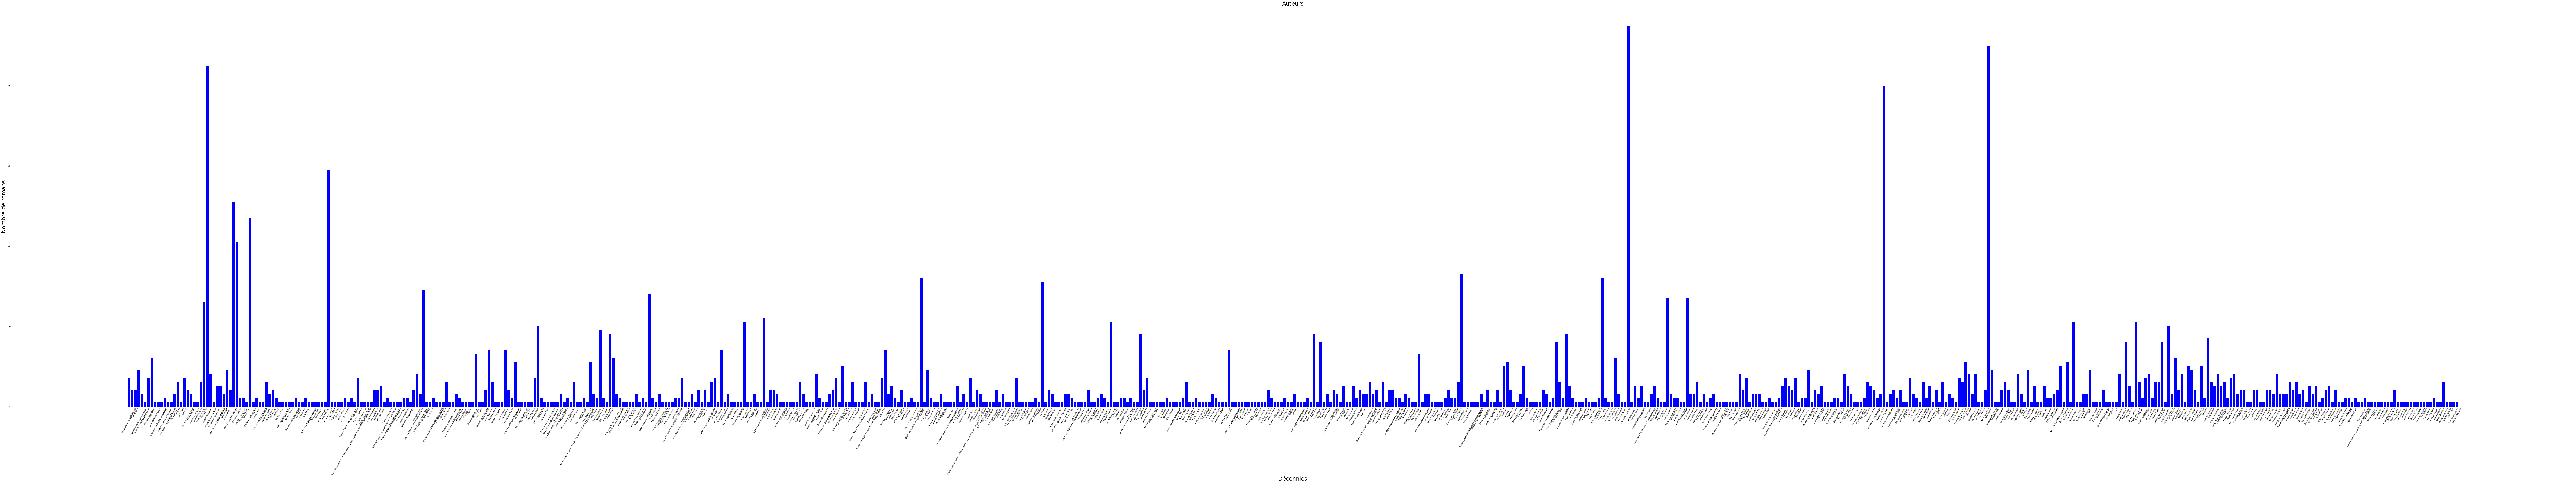

In [22]:
plt.figure(figsize=(250,40))
plt.bar(auteur, conteur, color='b')
plt.xticks(rotation=60)
plt.ylabel('Nombre de romans',fontsize=30)
plt.xlabel('Décennies',fontsize=30)
plt.title('Auteurs',fontsize=30)
plt.show()

Il y a quelques bugs dans l'affichage, et le diagramme n'est pas en soi pertinent.
Par contre on peut selectionner les auteurs les plus présent dans le corpus

In [23]:
def list_auteur_surrepresente(dico_auteur):
    auteur_surrepresente = []
    conteur_surrepresente = []
    for keys, values in dico_auteur.items():
        if values > 20:
            auteur_surrepresente.append(keys)
            conteur_surrepresente.append(values)
    return auteur_surrepresente, conteur_surrepresente

In [24]:
auteur_surrepresente, conteur_surrepresente = list_auteur_surrepresente(dict_auteur)

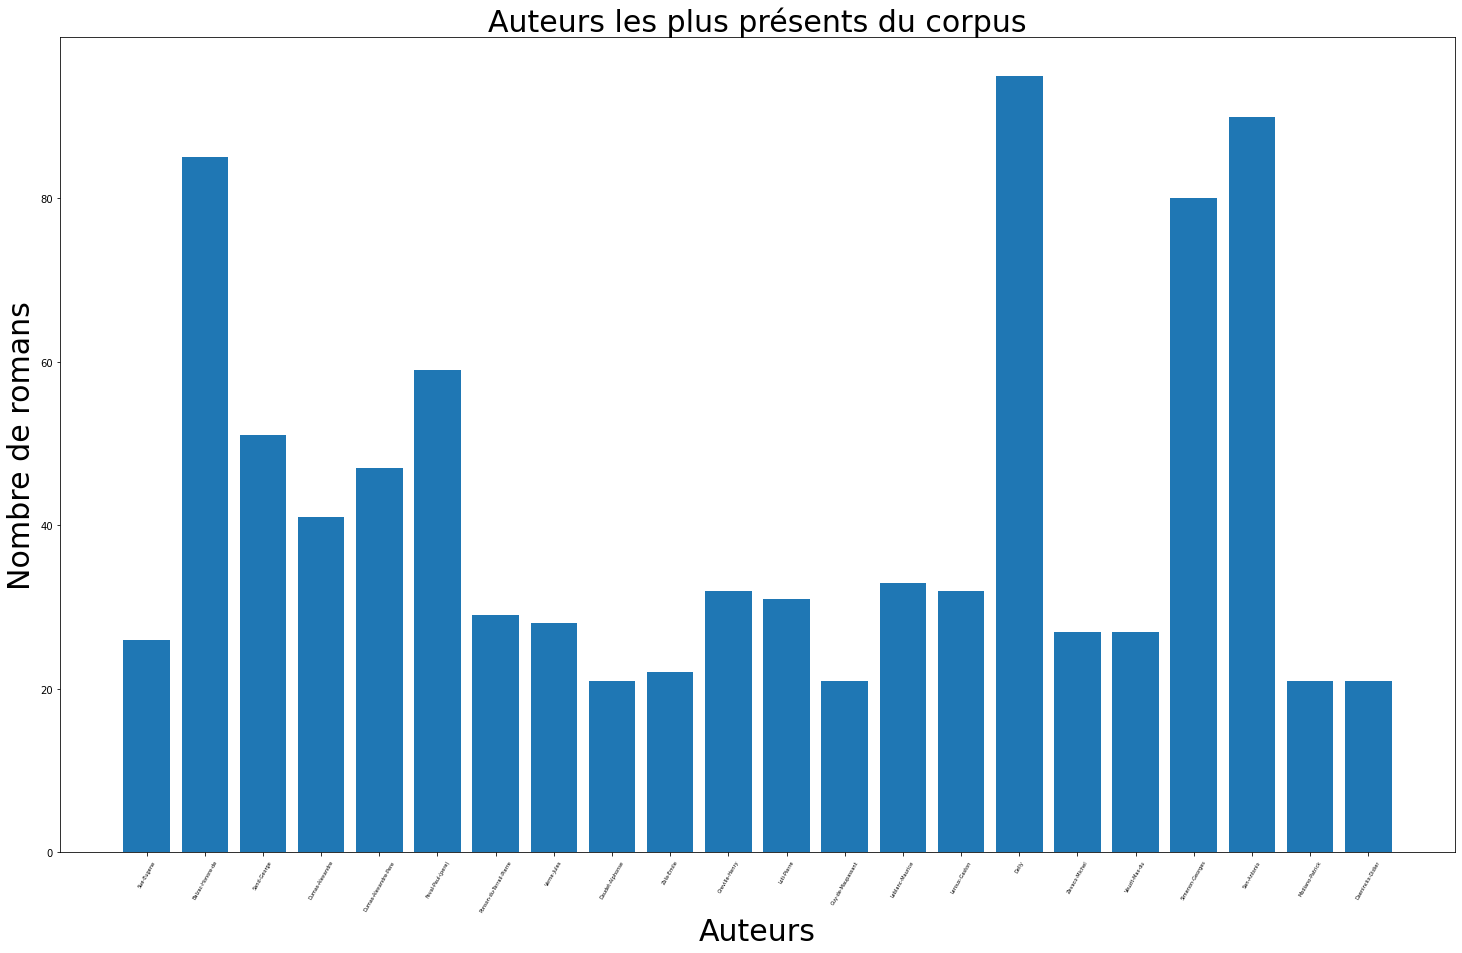

In [26]:
plt.figure(figsize=(25,15))
plt.bar(auteur_surrepresente, conteur_surrepresente)
plt.xticks(fontsize=5, rotation=60)
plt.ylabel('Nombre de romans',fontsize=30)
plt.xlabel('Auteurs',fontsize=30)
plt.title('Auteurs les plus présents du corpus',fontsize=30)
plt.show()